## Predicting house prices using machine learning regression model

## 1. Problem Definition

Trying to find a pattern in the house prices, comparing houses with different attributes.

Analyzing if its worth investing in renovated or non renovated houses.

## 2. Data
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


the dataset is available at https://www.kaggle.com/harlfoxem/housesalesprediction

## 3. Features

1.price - house price

2.bedrooms - number of bedrooms

3.bathrooms - number of bathrooms

4.sqft_living - size of living room in sqft

5.sqft_lot - size of the entire house lot in sqft

6.floors - number of floors in the house

7.waterfront - if the house has waterfront view. (1- yes, 0- no)

8.view - the house view grade(0 thru 5). (4-great view,0-no view)

9.condition - house condition(1 thru 5). (5-great, 1-horrible)

10.grade

11.sqft_above - size of the upper floor in sqft

12.sqft_basemente - size of the basement in sqft

13.yr_built - year the property was built

14.yr_renovated - year the property was renovated (0 if never been renovated)

15.zipcode - property zipcode

16.lat - house latitude coordinate

17.long - house longitude coordinate


## 4. Evaluation

The model evaluation will be made using the following:

r2 score - coefficient of determination regression score function which 1 is the perfect result and 0 the worst 

Mean absolute error -  the mean Prediction Error => Actual Value - Predicted Value



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## LOADING THE DATA



In [6]:
df = pd.read_csv('house/kc_house_data.csv',parse_dates=['date'])


In [186]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df['renovated'] = np.where(df['yr_renovated']!= 0, 1, 0)


## EXPLORING THE DATA

In [171]:
#checking if there are missing values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

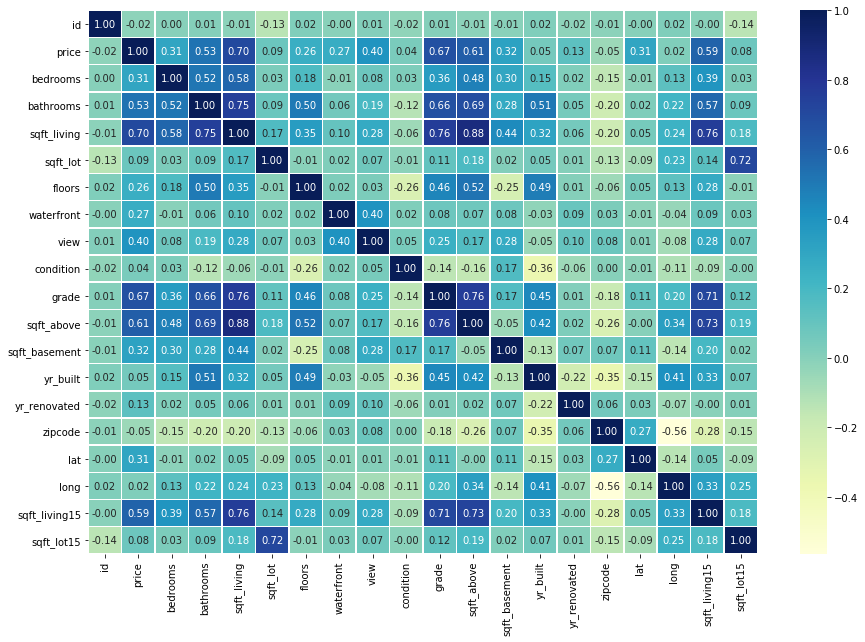

In [13]:
#checking the features correlation using a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

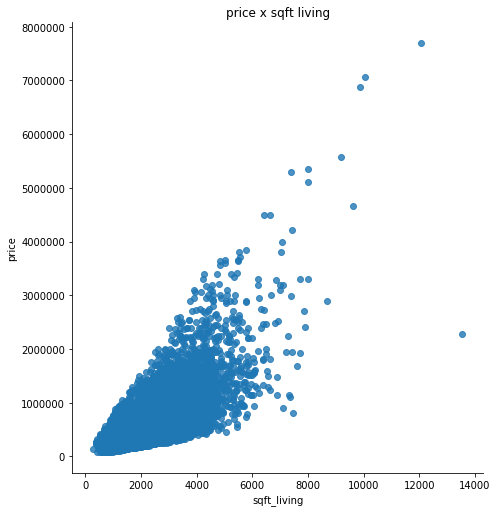

In [8]:
vis1 = sns.lmplot(data=df,x='sqft_living',y='price',fit_reg=False,height=7)
plt.title('price x sqft living')
vis1.savefig('output1.png')

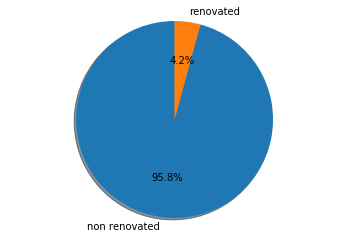

In [28]:
labels = 'non renovated', 'renovated'
sizes = [20699, 914]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('outputpie.png')
plt.show()

In [16]:
#checking the mean price of renovated houses
reno = df['price'].iloc[np.where(df.yr_renovated > 0)].mean()
noreno = df['price'].iloc[np.where(df.yr_renovated == 0)].mean()

In [17]:
values = {"mean_price_renovated": reno, "mean_price_no_renovated": noreno}
print(values)

{'mean_price_renovated': 760379.0295404814, 'mean_price_no_renovated': 530360.8181554665}


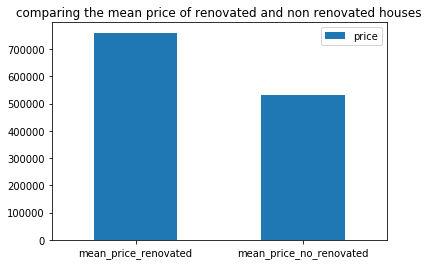

<Figure size 432x288 with 0 Axes>

In [18]:
model_compare = pd.DataFrame(values, index=["price"])
model_compare.T.plot.bar();
plt.title("comparing the mean price of renovated and non renovated houses")
plt.xticks(rotation=0)
plt.show()
plt.savefig('output6.png')


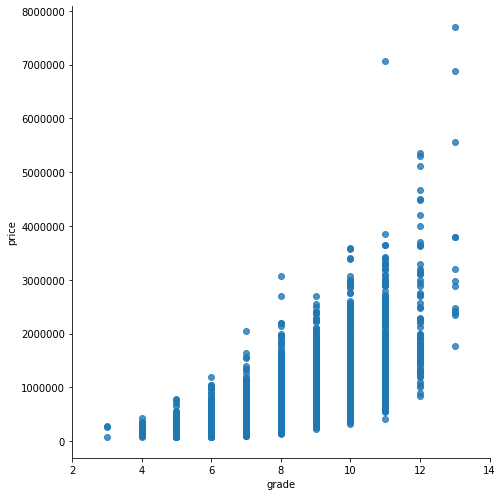

In [9]:
vis1 = sns.lmplot(data=df,x='grade',y='price',fit_reg=False,height=7)
vis1.set(xlim=(2,14))
vis1.savefig('output2.png')

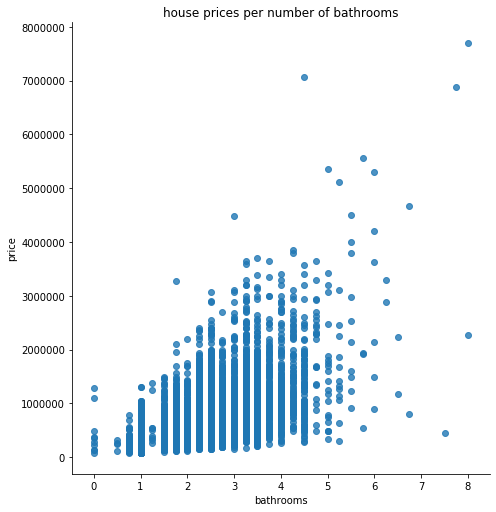

In [10]:
vis1 = sns.lmplot(data=df,x='bathrooms',y='price',fit_reg=False,height=7)
plt.title('house prices per number of bathrooms')
plt.show()
vis1.savefig('output3.png')

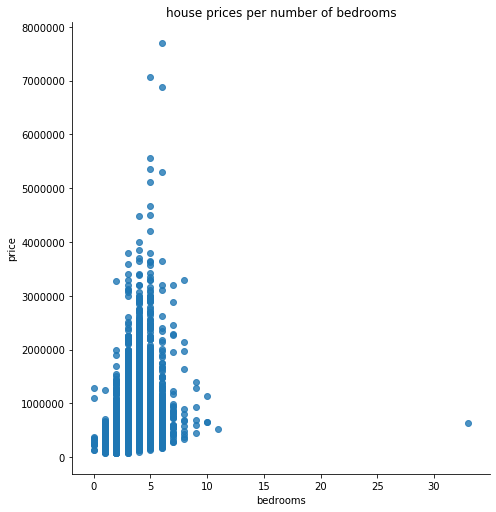

In [11]:
vis1 = sns.lmplot(data=df,x='bedrooms',y='price',fit_reg=False,height=7)
plt.title('house prices per number of bedrooms')
plt.show()
vis1.savefig('output4.png')

In [100]:
df.drop('date',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
X = df.drop('price',axis=1)
y = df['price']

In [19]:
new = df.loc[(df.yr_renovated > 0)]
teste = new.groupby(['bathrooms'])['price'].mean().reset_index(name='price')


In [20]:
nonew = df.loc[(df.yr_renovated == 0)]
teste1 = nonew.groupby(['bathrooms'])['price'].mean().reset_index(name='price')


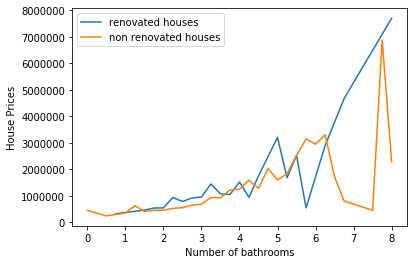

In [21]:
plt.plot(teste.bathrooms, teste.price, label="renovated houses")
plt.plot(teste1.bathrooms, teste1.price, label="non renovated houses")
plt.xlabel("Number of bathrooms")
plt.ylabel("House Prices")
plt.legend()
plt.savefig('output7.png')


In [22]:
teste2 = nonew.groupby(['bedrooms'])['price'].mean().reset_index(name='price')
teste3 = new.groupby(['bedrooms'])['price'].mean().reset_index(name='price')


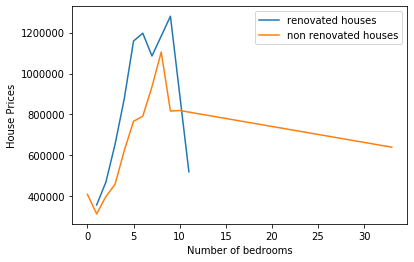

In [23]:
plt.plot(teste3.bedrooms, teste3.price, label="renovated houses")
plt.plot(teste2.bedrooms, teste2.price, label="non renovated houses")
plt.xlabel("Number of bedrooms")
plt.ylabel("House Prices")
plt.legend()
plt.savefig('output8.png')


## SPLIT THE DATA
Now we'll split the dataset into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [102]:
#splitting the data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

## FINDING THE BEST PARAMETERS AND FITTING THE MODEL

Here the randomizedsearchCV method is used to find the best parameters to our model. after that, the parameters found are automatically used to fit the model


In [105]:
#using randomizedsearchCV to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(100, 1500, 100), "max_depth": [None, 3,  5, 10], "max_features": [0.5, 1, "auto", "sqrt"],
       "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}
rs_model =RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42), param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)
rs_model.fit(X_train,y_train)
print(rs_model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.7min finished


{'n_estimators': 800, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': None}


## MAKING PREDICTIONS

Once a model has been trained on a given set of data, it can be used to make predictions on new sets of input data. here we'll make predicts using the test set

In [115]:
#predicting the prices in the test set
y_preds = rs_model.predict(X_test)

In [116]:
#comparing the predictions and the real prices using r2 score
r2_score(y_test,y_preds)

0.8579132837972225

In [117]:
#calcutating the mean error in the predicted values
mean_absolute_error(y_test, y_preds)

72869.96526882514